In [16]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./tmp/output/data.csv")

In [21]:
# Drop netplan time from baseline tests as that one comes from 1st boot and it should not be compared.
df.loc[df["base_or_update"] == "baseline", "netplan_time"] = 0

# Categories:
df['release'] = df['release'].astype('category')
df['base_or_update'] = df['base_or_update'].astype('category')

In [22]:
df.head()

,release,timestamp,base_or_update,systemd_local_time,local_time,netplan_time
0,jammy,1679936127,update,2.335,0.849,0.394
1,jammy,1679937719,update,2.582,0.820,0.394
2,jammy,1679938094,baseline,1.844,0.330,0.000
3,jammy,1679938446,baseline,1.902,0.342,0.000
4,jammy,1679936529,update,2.602,0.741,0.323


In [23]:
# df[["systemd_local_time", "local_time", "netplan_time"]][df["base_or_update"] == "update"]
# df[df["base_or_update"] == "update"]

In [24]:
df.groupby(["release", "base_or_update"]).mean()
# There is no substantial difference across releases

timestamp  systemd_local_time  local_time  \
release base_or_update                                                 
bionic  baseline        1.679942e+09              2.0796      0.3144   
        update          1.679942e+09              2.5285      0.7382   
focal   baseline        1.679939e+09              2.0543      0.3193   
        update          1.679939e+09              2.4713      0.7906   
jammy   baseline        1.679937e+09              2.0433      0.3146   
        update          1.679937e+09              2.5044      0.7914   

                        netplan_time  
release base_or_update                
bionic  baseline              0.0000  
        update                0.3177  
focal   baseline              0.0000  
        update                0.3528  
jammy   baseline              0.0000  
        update                0.3482

In [25]:
df_mean = df.drop(columns=["release"]).groupby(["base_or_update"]).mean().copy()

In [26]:
df_mean

,timestamp,systemd_local_time,local_time,netplan_time
base_or_update,,,,
baseline,1.679939e+09,2.059067,0.3161,0.000000
update,1.679939e+09,2.501400,0.7734,0.339567


In [27]:
# Calculates the increased time when enabling network update on every boot:
df_mean.loc["baseline"] *= -1
df_mean.sum()

timestamp             0.000000
systemd_local_time    0.442333
local_time            0.457300
netplan_time          0.339567
dtype: float64

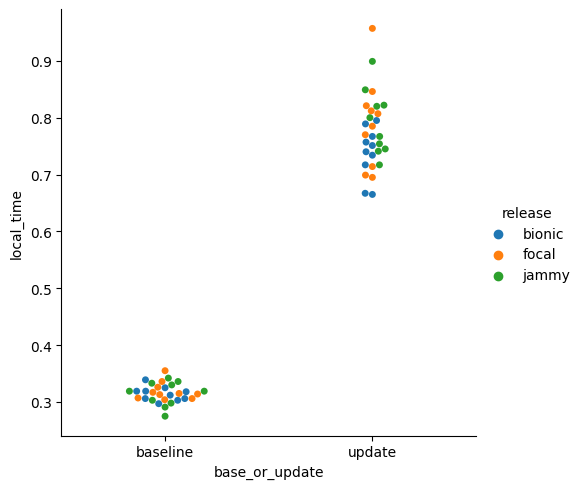

In [39]:
ax = sns.catplot(data=df, x="base_or_update", y="local_time", hue="release", kind="swarm")
ax.figure.savefig("./tmp/output/out.png") 